# ABS tutorial 01

## basics of `abssep` class

In this tutorial we write a simple data processing pipeline manually and show when and how ABS method comes into the CMB extraction.

In [1]:
import numpy as np
import matplotlib
import healpy as hp
import logging as log
import abspy as ap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#log.basicConfig(filename='abspy_tutorial02.log', level=log.DEBUG)

### read in maps

- `TQU_xxGHz_rM.fits`, corresponds to frequency xx GHz and $N_{side}$ $2^{M}$.

In [2]:
NSIDE = 128
map30 = hp.read_map('./data/TQU_30GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map95 = hp.read_map('./data/TQU_95GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map150 = hp.read_map('./data/TQU_150GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map353 = hp.read_map('./data/TQU_353GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
mapcmb = hp.read_map('./data/TQU_CMB_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
print (map95.shape, map95.dtype)

(3, 196608) float64


- visualize

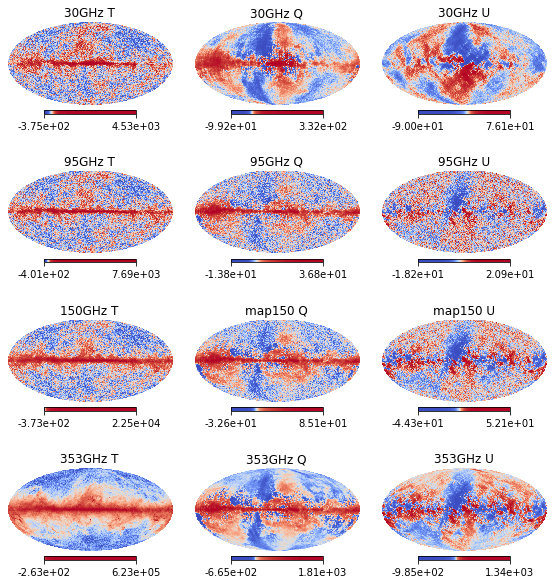

In [3]:
fig = matplotlib.pyplot.figure(figsize=(10,10))
gs = matplotlib.gridspec.GridSpec(55, 30)

fig.add_subplot(gs[0:10, 0:10])
hp.mollview(map30[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='30GHz T',cbar=1)
fig.add_subplot(gs[0:10, 10:20])
hp.mollview(map30[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='30GHz Q',cbar=1)
fig.add_subplot(gs[0:10, 20:30])
hp.mollview(map30[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='30GHz U',cbar=1)

fig.add_subplot(gs[15:25, 0:10])
hp.mollview(map95[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='95GHz T',cbar=1)
fig.add_subplot(gs[15:25, 10:20])
hp.mollview(map95[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='95GHz Q',cbar=1)
fig.add_subplot(gs[15:25, 20:30])
hp.mollview(map95[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='95GHz U',cbar=1)

fig.add_subplot(gs[30:40, 0:10])
hp.mollview(map150[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='150GHz T',cbar=1)
fig.add_subplot(gs[30:40, 10:20])
hp.mollview(map150[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='map150 Q',cbar=1)
fig.add_subplot(gs[30:40, 20:30])
hp.mollview(map150[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='map150 U',cbar=1)

fig.add_subplot(gs[45:55, 0:10])
hp.mollview(map353[0],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='353GHz T',cbar=1)
fig.add_subplot(gs[45:55, 10:20])
hp.mollview(map353[1],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='353GHz Q',cbar=1)
fig.add_subplot(gs[45:55, 20:30])
hp.mollview(map353[2],format='%.2e',
            norm='hist',cmap='coolwarm',hold=True,title='353GHz U',cbar=1)

### assemble $C^{XX}_\ell$s to ABSpy required shape (without noise)

- total PS, comes in shape $(N_\ell,N_\nu,N_\nu)$

In [4]:
Nfreq = 4  # 30,95,150,353
Nell = 3*NSIDE-1  # Nside corresponds to maximal 3Nside-1
print ('number of frequency bands',Nfreq)
print ('number of angular modes',Nell)

tt_total = np.zeros((Nell+1,Nfreq,Nfreq))
ee_total = np.zeros((Nell+1,Nfreq,Nfreq))
bb_total = np.zeros((Nell+1,Nfreq,Nfreq))

number of frequency bands 4
number of angular modes 383


In [5]:
auto_30 = hp.anafast(map30,lmax=Nell)
auto_95 = hp.anafast(map95,lmax=Nell)
auto_150 = hp.anafast(map150,lmax=Nell)
auto_353 = hp.anafast(map353,lmax=Nell)
cross_30_95 = hp.anafast(map30,map95,lmax=Nell)
cross_30_150 = hp.anafast(map30,map150,lmax=Nell)
cross_30_353 = hp.anafast(map30,map353,lmax=Nell)
cross_95_150 = hp.anafast(map95,map150,lmax=Nell)
cross_95_353 = hp.anafast(map95,map353,lmax=Nell)
cross_150_353 = hp.anafast(map150,map353,lmax=Nell)

print (auto_95.shape, auto_95.dtype)

for i in range(Nell+1):
    # diagnoal
    tt_total[i,0,0] = auto_30[0,i]
    tt_total[i,1,1] = auto_95[0,i]
    tt_total[i,2,2] = auto_150[0,i]
    tt_total[i,3,3] = auto_353[0,i]
    
    ee_total[i,0,0] = auto_30[1,i]
    ee_total[i,1,1] = auto_95[1,i]
    ee_total[i,2,2] = auto_150[1,i]
    ee_total[i,3,3] = auto_353[1,i]
    
    bb_total[i,0,0] = auto_30[2,i]
    bb_total[i,1,1] = auto_95[2,i]
    bb_total[i,2,2] = auto_150[2,i]
    bb_total[i,3,3] = auto_353[2,i]
    # cross
    tt_total[i,0,1] = cross_30_95[0,i]
    tt_total[i,0,2] = cross_30_150[0,i]
    tt_total[i,0,3] = cross_30_353[0,i]
    tt_total[i,1,2] = cross_95_150[0,i]
    tt_total[i,1,3] = cross_95_353[0,i]
    tt_total[i,2,3] = cross_150_353[0,i]
    tt_total[i,1,0] = tt_total[i,0,1]
    tt_total[i,2,0] = tt_total[i,0,2]
    tt_total[i,3,0] = tt_total[i,0,3]
    tt_total[i,2,1] = tt_total[i,1,2]
    tt_total[i,3,1] = tt_total[i,1,3]
    tt_total[i,3,2] = tt_total[i,2,3]
    
    ee_total[i,0,1] = cross_30_95[1,i]
    ee_total[i,0,2] = cross_30_150[1,i]
    ee_total[i,0,3] = cross_30_353[1,i]
    ee_total[i,1,2] = cross_95_150[1,i]
    ee_total[i,1,3] = cross_95_353[1,i]
    ee_total[i,2,3] = cross_150_353[1,i]
    ee_total[i,1,0] = ee_total[i,0,1]
    ee_total[i,2,0] = ee_total[i,0,2]
    ee_total[i,3,0] = ee_total[i,0,3]
    ee_total[i,2,1] = ee_total[i,1,2]
    ee_total[i,3,1] = ee_total[i,1,3]
    ee_total[i,3,2] = ee_total[i,2,3]
    
    bb_total[i,0,1] = cross_30_95[2,i]
    bb_total[i,0,2] = cross_30_150[2,i]
    bb_total[i,0,3] = cross_30_353[2,i]
    bb_total[i,1,2] = cross_95_150[2,i]
    bb_total[i,1,3] = cross_95_353[2,i]
    bb_total[i,2,3] = cross_150_353[2,i]
    bb_total[i,1,0] = bb_total[i,0,1]
    bb_total[i,2,0] = bb_total[i,0,2]
    bb_total[i,3,0] = bb_total[i,0,3]
    bb_total[i,2,1] = bb_total[i,1,2]
    bb_total[i,3,1] = bb_total[i,1,3]
    bb_total[i,3,2] = bb_total[i,2,3]

(6, 384) float64


### use the ABSpy module

the `__call__` or `run()` function returns:

- angular mode position $\ell_{binned}$
- CMB power-spectrum $D_\ell$, normalized with $\frac{\ell(\ell+1)}{2\pi}$, at $\ell_{binned}$

### ABS (initialization/instantiation) Parameters: 

**singal** : numpy.ndarray
> The total CROSS power-sepctrum matrix,
  with global size (N_modes, N_freq, N_freq).
    - N_freq: number of frequency bands
    - N_modes: number of angular modes
            
**noise** : numpy.ndarray
> The ensemble averaged (instrumental) noise CROSS power-sepctrum,
  with global size (N_modes, N_freq, N_freq).
  - N_freq: number of frequency bands
  - N_modes: number of angular modes
            
**nrms** : numpy.ndarray
> The RMS of ensemble (instrumental) noise AUTO power-spectrum,
  with global size (N_modes, N_freq).
  - N_freq: number of frequency bands
  - N_modes: number of angular modes
            
**bins** : (positive) integer
> The bin width of angular modes.
            
**modes** : list, tuple
> The list of angular modes of given power spectra.
            
**shift** : (positive) float
> Global shift to the target power-spectrum,
  defined in Eq. (3) of [ABS method paper](https://academic.oup.com/mnras/article-abstract/484/2/1616/5289912).
            
**threshold** : (positive) float
> The threshold of signal to noise ratio, for information extraction.
            
**resampsize** : (positive) integer
> The ensemble size of resampled signal observations,
  it is a hidden parameter by default 500,
  and is only activated by given noise.

In [6]:
separator = ap.abssep(tt_total,bins=20,shift=10.,threshold=1.)
rslt_tt = separator()

In [7]:
separator = ap.abssep(ee_total,bins=20,shift=30.,threshold=1.)
rslt_ee = separator()

In [8]:
separator = ap.abssep(bb_total,bins=20,shift=30.,threshold=1.)
rslt_bb = separator()

(1, 384)

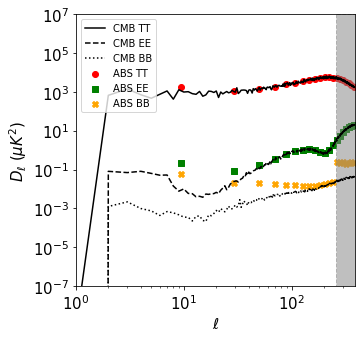

In [9]:
fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))

ax.scatter(rslt_tt[0],rslt_tt[1],
           color='red',marker='o',label=r'ABS TT')
ax.scatter(rslt_ee[0],rslt_ee[1],
           color='green',marker='s',label=r'ABS EE')
ax.scatter(rslt_bb[0],rslt_bb[1],
           color='orange',marker='X',label=r'ABS BB')

cmb_cl = hp.anafast(mapcmb)
ell = np.arange(cmb_cl.shape[1])
ax.plot((0.5/np.pi)*ell*(ell+1)*cmb_cl[0],
        color='black',linestyle='-',label=r'CMB TT')
ax.plot((0.5/np.pi)*ell*(ell+1)*cmb_cl[1],
        color='black',linestyle='--',label=r'CMB EE')
ax.plot((0.5/np.pi)*ell*(ell+1)*cmb_cl[2],
        color='black',linestyle=':',label=r'CMB BB')

ax.fill_between((2*NSIDE,3*NSIDE),(1e-7,1e-7),(1e7,1e7),
                color='gray',linestyle='--',alpha=0.5)

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=2)
ax.set_xlabel(r'$\ell$',fontsize=15)
ax.set_ylabel(r'$D_\ell$ ($\mu K^2$)',fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.set_ylim((1.e-7,1.e7))
ax.set_xlim((1,3*NSIDE))

- comments:

For the BB spectrum extracted by ABS method, the $\ell > 300$ issue is purely due to the limitation of $N_{side}$ we adopt for illustration, higher $N_{side}$ maps will bring expected results.

end